# Using n-gram in Text-Fabric (N1904-TF)

## Table of content (ToC)<a class="anchor" id="TOC"></a>
* <a href="#bullet1">1 - Introduction</a>
* <a href="#bullet2">2 - Load Text-Fabric app and data</a>
* <a href="#bullet3">3 - Extracting n-grams</a>
    *  <a href="#bullet3x1">3.1 - Define the n-gram size</a>
    *  <a href="#bullet3x2">3.2 - Iterate through the text and extract n-grams</a>
* <a href="#bullet4">4 - Analyzing the n-grams</a>
    *  <a href="#bullet4x1">4.1 - N-gram frequency analysis</a>
    *  <a href="#bullet4x2">4.2 - POS-sequence frequency analysis</a>
    *  <a href="#bullet4x3">4.3 - N-grams and ambiguity</a>
    *  <a href="#bullet4x4">4.4 - Correlating preceding n-grams with final POS tagging</a>
* <a href="#bullet5">5 - Required libraries</a>
* <a href="#bullet6">6 - Notebook version details</a>

# 1 - Introduction <a class="anchor" id="bullet1"></a>
##### [Back to ToC](#TOC)

An n-gram is a contiguous sequence of n items (typically words or characters) from a given text or speech. In the context of a text corpus, an n-gram is used to analyze patterns of word usage and co-occurrence by grouping items into chunks of size n. For example, a 1-gram (unigram) would analyze individual words, while a 2-gram (bigram) would examine pairs of consecutive words. N-grams are particularly useful in natural language processing (NLP) for tasks like text prediction, language modeling, and understanding the structure and context within a large corpus of texts. This notebook will show how to create n-grams within the Text-Fabric environment.

# 2 - Load app and data <a class="anchor" id="bullet2"></a>
##### [Back to ToC](#TOC)

In [3]:
%load_ext autoreload
%autoreload 2

In [4]:
# Loading the Text-Fabric code
# Note: it is assumed Text-Fabric is installed in your environment
from tf.fabric import Fabric
from tf.app import use

In [7]:
# load the N1904 app and data
N1904 = use ("CenterBLC/N1904", version="1.0.0", hoist=globals())

**Locating corpus resources ...**

Name,# of nodes,# slots / node,% coverage
book,27,5102.93,100
chapter,260,529.92,100
verse,7944,17.34,100
sentence,8011,17.20,100
group,8945,7.01,46
clause,42506,8.36,258
wg,106868,6.88,533
phrase,69007,1.90,95
subphrase,116178,1.60,135
word,137779,1.00,100


Display is setup for viewtype [syntax-view](https://github.com/CenterBLC/N1904/blob/main/docs/syntax-view.md#start)

See [here](https://github.com/CenterBLC/N1904/blob/main/docs/viewtypes.md#start) for more information on viewtypes

In [8]:
# The following will push the Text-Fabric stylesheet to this notebook (to facilitate proper display with notebook viewer)
N1904.dh(N1904.getCss())

# 3 - Extracting n-grams <a class="anchor" id="bullet3"></a>
##### [Back to ToC](#TOC)

We'll extract n-grams of words along with their POS tags.

In the following script we rely upon the following Text-Fabric features:
  - Greek word in Unicode from feature [unicode](https://centerblc.github.io/N1904/features/unicode.html#start)
  - Part of speech tag from feature [sp](https://centerblc.github.io/N1904/features/sp.html#start).
  - The lemma (dictionary form) from feature [lemma](https://centerblc.github.io/N1904/features/lemma.html#start).
  - The morphological tag from feature [morph](https://centerblc.github.io/N1904/features/morph.html#start).

## 3.1 - Define the n-gram size <a class="anchor" id="bullet3x1"></a>

Set the size of the n-gram you wish to extract. For example, `n = 2` for bi-grams or `n = 3` for tri-grams. A lower n (e.g., 1 or 2) provides a more granular and fine analysis, focusing on smaller units, which can be useful for basic statistics or initial insights. A higher n (e.g., 3 or more) captures more nuanced and structured relationships, which can be useful in more complex linguistic or computational tasks.

In [39]:
# Setting the size of the n-gram
n = 3  # This would be for bigrams, change to 3 for trigrams, etc.

## 3.2 - Iterate through the text and extract n-grams <a class="anchor" id="bullet3x2"></a>

The following script retrieves first all chapter nodes with `F.otype.s('chapter')` and gets their word descendants using `L.d(chapterNode, 'word')`. The `extractNGrams(words, n)` function generates n-grams from these word lists. Features features like unicode, sp, lemma, and morph are used to create each n-gram item. The n-grams are stored as dictionaries, and the first five are printed for verification.

In [42]:
# Function to extract n-grams from a list of words
def extractNGrams(words, n):
    return [words[i:i+n] for i in range(len(words) - n + 1)]

# Collect all n-grams in a list
allNGrams = []

# Iterate over all verses in the New Testament
for chapterNode in F.otype.s('chapter'):
    wordsInChapter = L.d(chapterNode, 'word')
    nGramsInChapter = extractNGrams(wordsInChapter, n)
    
    for nGram in nGramsInChapter:
        nGramData = []
        for wordNode in nGram:
            wordText = F.unicode.v(wordNode)      # Greek word in Unicode
            posTag = F.sp.v(wordNode)             # Part of Speech
            lemma = F.lemma.v(wordNode)           # Lemma of the word
            morph = F.morph.v(wordNode)           # Morphological  code
            
            # Collect data for each word in the n-gram
            nGramData.append({
                'wordText': wordText,
                'posTag': posTag,
                'lemma': lemma,
                'morph': morph
            })
        
        # Add the n-gram data to the list
        allNGrams.append(nGramData)


In [44]:
# verification - Print the first 5 n-grams
for nGramData in allNGrams[:5]:
    words = [wordData['wordText'] for wordData in nGramData]
    posTags = [wordData['posTag'] for wordData in nGramData]
    print(f"Words: {' '.join(words)}")
    print(f"POS Tags: {posTags}")
    print('-' * 50)

Words: Βίβλος γενέσεως Ἰησοῦ
POS Tags: ['subs', 'subs', 'subs']
--------------------------------------------------
Words: γενέσεως Ἰησοῦ Χριστοῦ
POS Tags: ['subs', 'subs', 'subs']
--------------------------------------------------
Words: Ἰησοῦ Χριστοῦ υἱοῦ
POS Tags: ['subs', 'subs', 'subs']
--------------------------------------------------
Words: Χριστοῦ υἱοῦ Δαυεὶδ
POS Tags: ['subs', 'subs', 'subs']
--------------------------------------------------
Words: υἱοῦ Δαυεὶδ υἱοῦ
POS Tags: ['subs', 'subs', 'subs']
--------------------------------------------------


# 4 - Analyzing the n-grams <a class="anchor" id="bullet4"></a>
##### [Back to ToC](#TOC)

Once the n-grams are obtained, we can perform various analyses on the extracted n-grams. This section provides a few examples.

## 4.1 - N-gram frequency analysis <a class="anchor" id="bullet4x1"></a>

The following script provides an statistic overview of the most frequent n-grams. 

In [45]:
from collections import Counter
import pandas as pd
from IPython.display import display

# Convert n-grams to tuples of word texts for counting
nGramTuples = [tuple(wordData['wordText'] for wordData in nGram) for nGram in allNGrams]

# Count the frequency of each n-gram
nGramFrequency = Counter(nGramTuples)

# Prepare the data for the DataFrame
nGramData = [{'N-Gram': ' '.join(nGram), 'Frequency': freq} for nGram, freq in nGramFrequency.most_common(10)]

# Create a pandas DataFrame
df = pd.DataFrame(nGramData)

# Display the title and the DataFrame
display(HTML("<h3>Most common n-grams</h3>")) 
display(df)

,N-Gram,Frequency
0,ὁ Υἱὸς τοῦ,60
1,ὁ δὲ εἶπεν,54
2,τοῦ Κυρίου ἡμῶν,47
3,λέγω ὑμῖν ὅτι,42
4,ὁ δὲ Ἰησοῦς,42
5,Υἱὸς τοῦ ἀνθρώπου,41
6,τοῦ Θεοῦ καὶ,40
7,αὐτοῖς ὁ Ἰησοῦς,39
8,ὁ Ἰησοῦς εἶπεν,38
9,δὲ ἐγέννησεν τὸν,37


## 4.2 - POS-sequence frequency analysis <a class="anchor" id="bullet4x2"></a>

In [46]:
from collections import Counter
import pandas as pd
from IPython.display import display, HTML

# Extract POS tag sequences from n-grams
posSequences = [tuple(wordData['posTag'] for wordData in nGram) for nGram in allNGrams]

# Count the frequency of POS tag sequences
posSequenceFrequency = Counter(posSequences)

# Prepare the data for the DataFrame
posSequenceData = [{'POS Tag Sequence': ' '.join(posSeq), 'Frequency': freq} for posSeq, freq in posSequenceFrequency.most_common(10)]

# Create a pandas DataFrame
df_pos = pd.DataFrame(posSequenceData)

# Display the title and the DataFrame
display(HTML("<h3>Most common POS tag sequences</h3>"))  # Title added here
display(df_pos)

,POS Tag Sequence,Frequency
0,prep art subs,3568
1,verb art subs,3513
2,art subs pron,3390
3,art subs art,2846
4,subs art subs,2765
5,art subs verb,2666
6,art subs conj,2402
7,verb prep art,1837
8,conj art subs,1818
9,subs conj verb,1719


## 4.3 - N-grams and ambiguity <a class="anchor" id="bullet4x3"></a>

N-grams can be used improve POS tagging by identifying common contexts in which words appear. For instance, if a word is often preceded by a definite article, it's likely a noun. It can also be used for disambiguation. Suppose you encounter the word "ἕως" which (according the the MACULA XML Treebank) can be (in the context of the Greek New Testament) be either a preposition, a conjunction or a adverbial. The following script will generate a pie chart displaing the frequency distribution of the POS for the word "ἕως".

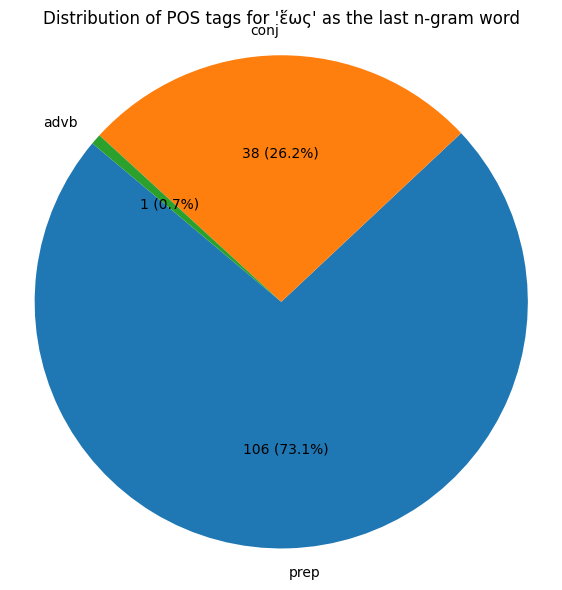

In [47]:
import pandas as pd
import matplotlib.pyplot as plt
from collections import Counter

# Define the target word in unicode
targetWord = 'ἕως'

# Prepare list to store the POS tags for "ἕως" when it's the last word
posTagsForTargetWord = []

# Find n-grams where "ἕως" is the last word and collect its POS tag
for nGramData in allNGrams:
    words = [wordData['wordText'] for wordData in nGramData]
    if words[-1] == targetWord:  # Only include if "ἕως" is the last word
        posTagsForTargetWord.append(nGramData[-1]['posTag'])  # Collect the POS tag of "ἕως"

# Count the frequency of each POS tag for "ἕως"
posTagFrequency = Counter(posTagsForTargetWord)

# Prepare data for the pie chart
labels = list(posTagFrequency.keys())
sizes = list(posTagFrequency.values())

# Function to display absolute numbers and percentages on the pie chart
def absolute_and_percentage(pct, allvals):
    absolute = int(pct/100. * sum(allvals))
    return f"{absolute} ({pct:.1f}%)"

# Plot the pie chart
plt.figure(figsize=(7,7))
plt.pie(sizes, labels=labels, autopct=lambda pct: absolute_and_percentage(pct, sizes), 
        startangle=140, shadow=False)
plt.title("Distribution of POS tags for 'ἕως' as the last n-gram word")
plt.axis('equal')  # Equal aspect ratio ensures that pie chart is drawn as a circle.

# Show the pie chart
plt.show()


## 4.4 - Correlating preceding n-grams with final POS tagging<a class="anchor" id="bullet4x4"></a>

This script analyzes the correlation between the part-of-speech (POS) tag sequences preceding the word "ἕως" and its POS tag when it appears as the last word in n-grams. It iterates through the n-grams, extracting the POS tags that precede "ἕως" and the POS tag assigned to "ἕως." These sequences are then grouped and counted, and a heatmap is generated to visualize how different preceding POS tag sequences are distributed across various POS tags of "ἕως," allowing to show the grammatical patterns leading up to its usage.

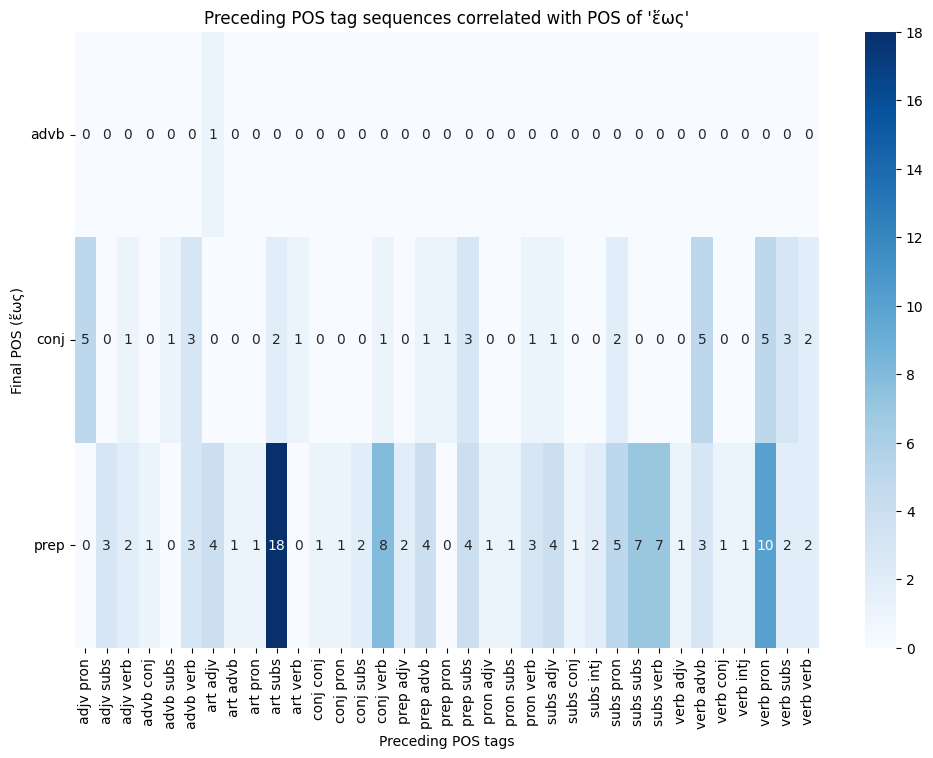

In [51]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter

# Define the target word in unicode
targetWord = 'ἕως'

# Prepare lists to store preceding POS tags and the POS of "ἕως"
precedingPOSTags = []
finalPOSForTargetWord = []

# Find n-grams where "ἕως" is the last word
for nGramData in allNGrams:
    words = [wordData['wordText'] for wordData in nGramData]
    if words[-1] == targetWord:  # Only include if "ἕως" is the last word
        posTags = [wordData['posTag'] for wordData in nGramData]
        precedingPOSTags.append(' '.join(posTags[:-1]))  # Collect preceding POS tags
        finalPOSForTargetWord.append(posTags[-1])  # Collect POS tag of "ἕως"

# Create a DataFrame to store the relationships
df = pd.DataFrame({
    'Preceding POS Tags': precedingPOSTags,
    'Final POS (ἕως)': finalPOSForTargetWord
})

# Count occurrences of preceding POS tag sequences grouped by the POS of "ἕως"
groupedData = df.groupby(['Final POS (ἕως)', 'Preceding POS Tags']).size().unstack(fill_value=0)

# Plot a heatmap to visualize the relationship between preceding POS tags and the POS of "ἕως"
plt.figure(figsize=(12, 8))
sns.heatmap(groupedData, annot=True, fmt="d", cmap="Blues", cbar=True)
plt.title("Preceding POS tag sequences correlated with POS of 'ἕως'")
plt.xlabel("Preceding POS tags")
plt.ylabel("Final POS (ἕως)")
plt.xticks(rotation=90)
plt.yticks(rotation=0)
plt.show()


# 5 - Required libraries <a class="anchor" id="bullet5"></a>
##### [Back to ToC](#TOC)

The scripts in this notebook require (beside `text-fabric`) the following Python libraries to be installed in your environment:

    pandas
    matplotlib
    seaborn
    collections

You can install any missing library from within Jupyter Notebook using either`pip` or `pip3`.

# 6 - Notebook and environment details<a class="anchor" id="bullet6"></a>
##### [Back to ToC](#TOC)

<div style="float: left;">
  <table>
    <tr>
      <td><strong>Author</strong></td>
      <td>Tony Jurg</td>
    </tr>
    <tr>
      <td><strong>Version</strong></td>
      <td>1.0</td>
    </tr>
    <tr>
      <td><strong>Date</strong></td>
      <td>20 October 2024</td>
    </tr>
  </table>
</div>